Grupo:

*   Luana Tiemann Halicki Cordeiro
*   Alexandre Cicero Araujo Beiruth
*   Leandro Cardoso Vieira
*   João Vitor Gabardo da Cunha


Área sob a curva da Questão a) usando Soma de Riemann: 24705.981964124996
Área sob a curva da Questão a) usando Álgebra: 24736.5

Área sob a curva da Questão b) usando Soma de Riemann: 134852914.265064
Área sob a curva da Questão b) usando Álgebra: 134982855.66080728

Área sob a curva da Questão c) usando Soma de Riemann: 8.300729694439966
Área sob a curva da Questão c) usando Álgebra: 8.306852819440055

Área sob a curva da Questão d) usando Soma de Riemann: 4.992930388445588
Área sob a curva da Questão d) usando Álgebra: 5.0

Área sob a curva da Questão e) usando Soma de Riemann: 28.58509995756612
Área sob a curva da Questão e) usando Álgebra: 28.68398574948249





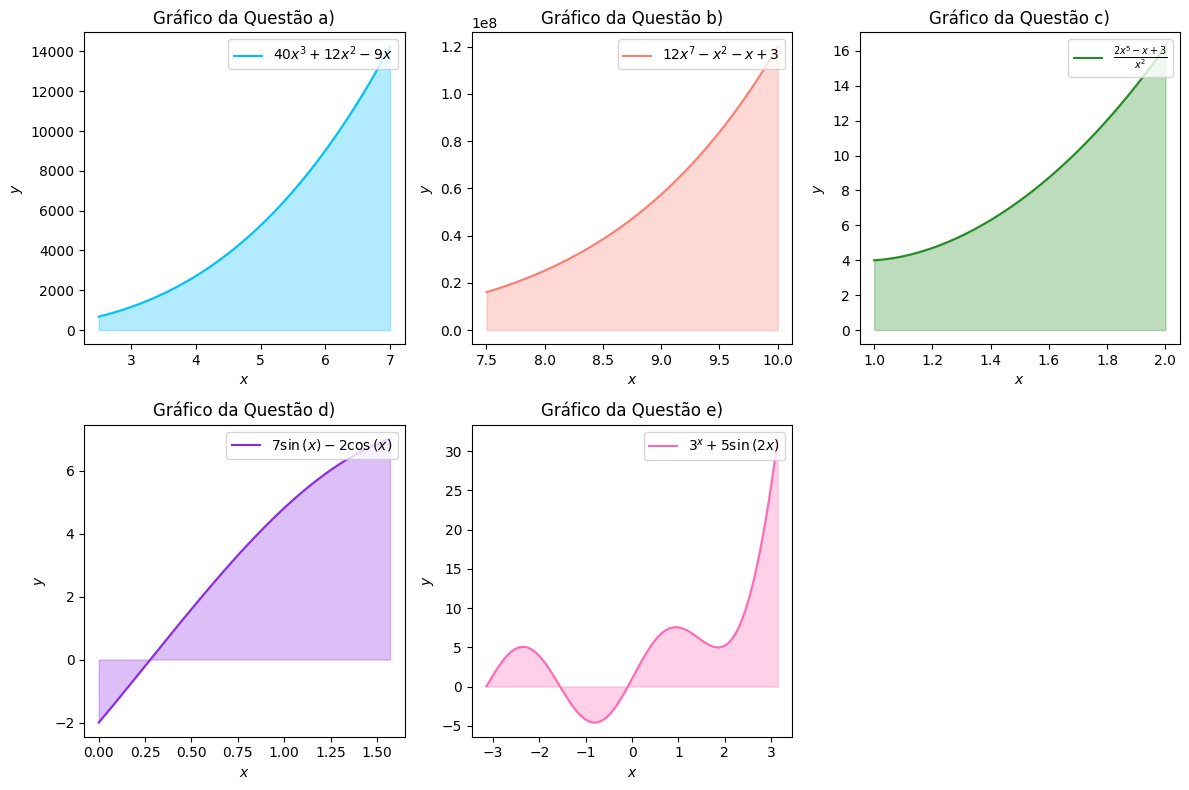

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define a variável e as funções
x = sp.symbols('x')
functions = [
    (40 * x ** 3 + 12 * x ** 2 - 9 * x, 2.5, 7),  # Função a: 40x^3 + 12x^2 - 9x, limites: 2.5, 7
    (12 * x ** 7 - x ** 2 - x + 3, 7.5, 10),     # Função b: 12x^7 - x^2 - x + 3, limites: 7.5, 10
    ((2 * x ** 5 - x + 3) / x ** 2, 1, 2),        # Função c: (2x^5 - x + 3) / x^2, limites: 1, 2
    (7 * sp.sin(x) - 2 * sp.cos(x), 0, np.pi/2),  # Função d: 7sin(x) - 2cos(x), limites: 0, pi/2
    (5 * sp.sin(2 * x) + 3 ** x, -np.pi, np.pi)   # Função e: 5sin(2x) + 3^x, limites: -pi, pi
]

# Função para cálculo da Soma de Riemann
def somaReimann(f, a, b, n):
    dx = (b - a) / n  # Tamanho de cada subintervalo
    x = np.linspace(a, b, n+1)  # Pontos dentro dos subintervalos
    y = f(x)  # Valores da função nos pontos
    somaReimann = np.sum(y[:-1] * dx)  # Cálculo da soma de Riemann
    return somaReimann

# Função para cálculo da área usando álgebra
def areaAlgebra(f, a, b):
    area = sp.integrate(f, (x, a, b)) #Cálculo da área usando álgebra
    return float(area)

# Função para plotagem do gráfico e cálculo da área usando Soma de Riemann e álgebra
def plotArea(f, a, b, n, color):
    fNumerico = sp.lambdify(x, f, 'numpy')  # Converte a função simbólica para uma função numérica
    xs = np.linspace(a, b, 100)  # Valores de x para plotagem do gráfico
    ys = fNumerico(xs)  # Valores de y correspondentes

    plt.plot(xs, ys, label='$' + sp.latex(f) + '$', color=color)  # Plota o gráfico com a função em Latex
    plt.fill_between(xs, ys, 0, where=(xs >= a) & (xs <= b), color=color, alpha=0.3)  # Preenche a área sob a curva

    reimann = somaReimann(fNumerico, a, b, n)  # Calcula a área usando a Soma de Riemann
    algebra = areaAlgebra(f, a, b)  # Calcula a área usando álgebra
    return reimann, algebra

# Plot dos gráficos e cálculo das áreas usando Soma de Riemann
plt.figure(figsize=(12, 8))

cores = ['deepskyblue', 'salmon', 'forestgreen', 'blueviolet', 'hotpink']

for i, (f, a, b) in enumerate(functions, 1):
    plt.subplot(2, 3, i)  # Cria o subplot correspondente a cada função
    reimann, algebra = plotArea(f, a, b, 1000, cores[i-1])  # Plota o gráfico e calcula as áreas
    plt.xlabel('$x$')  # Define o rótulo do eixo x
    plt.ylabel('$y$')  # Define o rótulo do eixo y
    plt.title(f'Gráfico da Questão {chr(96 + i)})')  # Define o título do subplot
    plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito

    print(f"\nÁrea sob a curva da Questão {chr(96 + i)}) usando Soma de Riemann:", reimann)  # Imprime a área calculada pela Soma de Riemann
    print(f"Área sob a curva da Questão {chr(96 + i)}) usando Álgebra:", algebra)  # Imprime a área calculada pela álgebra
print("\n\n")
plt.tight_layout()
plt.show()
